# Введение в анализ данных, ИАД-4

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): Байкалова Дарья

### Общая информация

__Дата выдачи:__ 05.03.2020

__Дедлайн:__ 19.03.2020 23:59

### О задании

В этом домашнем задании вы реализуете алгоритм kNN и линейную регрессию, попрактикуетесь в решении задачи регрессии, а также решите теоретические задачи.

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 18,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 18, а максимальное число дополнительных баллов, которые пойдут в бонус — 2. Бонусные задания отмечены звездочками (*).

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-4: zG1cIyT

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

# kNN своими руками (5)

В этом задании вам предстоит реализовать взвешенный алгоритм kNN для регрессии. Пусть необходимо вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

### Реализуйте две функции расстояния (1 балл)
- евклидова метрика **(0.5 балла)**
- метрика Манхэттена **(0.5 балла)**

Обе функции должны на вход получать матрицу `np.array of shape(n, m)` и вектор `np.array of shape(m,)`, а возвращать вектор расстояний от каждой строчки матрицы до вектора `np.array of shape(n,)`

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy.** 

In [28]:
import numpy as np

In [29]:
def euclidian_metric(X, y):
    distances = np.sqrt(np.sum((X - y) ** 2, 1))
    return distances

def manhattan_metric(X, y):
    distances = np.sum(abs(X - y), 1)
    return distances

In [30]:
# проверка
X = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
y = np.ones(3)

assert np.allclose(euclidian_metric(X, y), np.array([ 2.23606798,  8.77496439, 13.92838828]))
assert np.allclose(manhattan_metric(X, y), np.array([ 3., 15., 24.]))

### Реализуйте алгоритм kNN для регрессии (4 балла)

- реализуйте класс kNN для равномерных весов (то есть $w_1 = \ldots = w_k$) **(3 балла)**
- добавьте возможность передать данному классу параметр `weights='distance'` для вызова взвешенной версии алгоритма kNN (то есть $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$ **(1 балл)**

In [257]:
class KNN:
    def __init__(self, metric='euclid', k=5, weights='distance'):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """

        self.metric = metric
        self.k = k
        self.weights = weights
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        """

        self.X_train = X_train
        self.y_train = y_train
        
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
    # создадим массив, где каждому объекту обучающей выборки сопоставим значение из y_train
        answers = {}
        for i in range(self.X_train.shape[0]):
            answers[i] = self.y_train[i]
    # найдем расстояние от каждого вектора тестовой выборки до всех объектов обучающей выборки
        if self.metric == 'euclid':
            distances = [euclidian_metric(self.X_train, X_test[i]) for i in range(X_test.shape[0])]
        if self.metric == 'manhattan':
            distances = [manhattan_metric(self.X_train, X_test[i]) for i in range(X_test.shape[0])]

    # создадим список, где сохраним расстояние и индекс объекта
        d = []
        for vdist in distances:
            dwithnumbers = []
            aa=enumerate(vdist)
            for i in aa:
                dwithnumbers.append(i)
            d.append(dwithnumbers)
    # отсортируем список по расстаянию
        for elem in d:
            elem.sort(key=lambda x:x[1])

    # для каждого вектора тестовой выборки выберем значения y для индексов k ближайших объектов и сохраним это в список n, веса для реализации второго параметра сохраним в список w
        n = []
        w = []
        for elem in d:
            npr = []
            wpr = []
            for mele in elem[0:self.k]:
                npr.append(answers[mele[0]])
                wpr.append(1 / mele[1])
            n.append(npr)
            w.append(wpr)
    # найдем взвешенное значений элементов массива
        if self.weights == 'uniform':
            ans = []
            for elem in n:
                elem1 = np.array(elem)
                ans.append(np.mean(elem1))

        if self.weights == 'distance':
            ans = []
            for i in range(len(n)):
                elem1 = np.array(n[i])
                ans.append(np.average(elem1, weights=w[i]))
                    
                    
                    
        return np.array(ans)   

Сверьте для нескольких комбинаций различных гиперпараметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn`. **Не забудьте про гиперпараметр `weights`.**

In [42]:
np.random.seed(13)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [43]:
smth = KNN()
smth.fit(X_train, y_train)
smth.predict(X_test)

array([ 6.21280722e-02, -3.17360158e-01,  3.74427855e-02,  6.87962695e-01,
       -4.15584328e-01,  7.26859498e-01, -1.04722754e-01, -9.78176792e-02,
       -2.76017524e-01, -7.31623686e-01,  3.04193641e-01, -2.90229666e-01,
       -2.72176449e-01, -1.45574017e-01, -5.43920650e-02, -7.05167642e-01,
        5.69121728e-01, -5.97153514e-01, -6.88105128e-01, -7.84500737e-02,
       -1.12122504e+00,  4.71288715e-01,  8.67555537e-03,  3.97968660e-01,
        2.38916153e-01, -9.72598237e-02,  3.60564292e-01, -1.34376137e-01,
       -2.22401858e-02, -7.35096375e-02,  5.56066854e-01,  1.93796906e-01,
       -7.26206813e-02, -2.72416415e-01,  2.98575480e-02, -2.64548302e-01,
        1.44976395e-01, -4.17974748e-01,  1.10245471e-01, -7.49772580e-01,
        7.28536727e-01,  5.17357966e-01,  1.77259160e-01,  3.71310549e-01,
       -6.89293191e-01, -2.93850820e-01, -3.71083307e-01, -3.04261701e-01,
       -1.97931852e-01, -7.54646258e-01,  1.12109728e-01, -5.08077920e-01,
       -2.38415024e-01,  

In [44]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
predictions

array([ 6.21280722e-02, -3.17360158e-01,  3.74427855e-02,  6.87962695e-01,
       -4.15584328e-01,  7.26859498e-01, -1.04722754e-01, -9.78176792e-02,
       -2.76017524e-01, -7.31623686e-01,  3.04193641e-01, -2.90229666e-01,
       -2.72176449e-01, -1.45574017e-01, -5.43920650e-02, -7.05167642e-01,
        5.69121728e-01, -5.97153514e-01, -6.88105128e-01, -7.84500737e-02,
       -1.12122504e+00,  4.71288715e-01,  8.67555537e-03,  3.97968660e-01,
        2.38916153e-01, -9.72598237e-02,  3.60564292e-01, -1.34376137e-01,
       -2.22401858e-02, -7.35096375e-02,  5.56066854e-01,  1.93796906e-01,
       -7.26206813e-02, -2.72416415e-01,  2.98575480e-02, -2.64548302e-01,
        1.44976395e-01, -4.17974748e-01,  1.10245471e-01, -7.49772580e-01,
        7.28536727e-01,  5.17357966e-01,  1.77259160e-01,  3.71310549e-01,
       -6.89293191e-01, -2.93850820e-01, -3.71083307e-01, -3.04261701e-01,
       -1.97931852e-01, -7.54646258e-01,  1.12109728e-01, -5.08077920e-01,
       -2.38415024e-01,  

# Линейная регрессия своими руками (5)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

*Чему будет равен градиент этой функции по $w$? Вспомните, что за вектор $\hat{y}$ и как он зависит от $X$ и $w$.*

Эти ссылки могут показаться вам полезными:
- https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture02-linregr.pdf
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative

In [45]:
import matplotlib.pyplot as plt

%matplotlib inline

### Реализуйте функцию потерь Хьюбера для одного примера и ее градиент по весам (1.5 балла)

- функция потерь **(0.5 балла)**
- градиент **(1 балл)**

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy. Однако можно использовать оператор if.**

In [48]:
# \hat{y} = a = <w, x> => a' = x (частная производная по w)
def huber_loss(x, y, w, delta):
    """
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    loss - scalar
    """
    a = np.sum(x * w)
    if abs(y - a) <= delta:
        losses = 0.5 * (y - a) ** 2
        
    else:
        losses = delta * abs(y - a) - 0.5 * delta ** 2
    return losses

def huber_grad(x, y, w, delta):
    """
    INPUT:
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    grad - np.array shape=(d,)
    """
    a = np.sum(x * w)
    if abs(y - a) <= delta:
        h_grad = (-x) * (y - a)
        
    else:
        if y > a:
            h_grad = (-x) * delta
        else:
            h_grad = x * delta
    
    return h_grad


In [63]:
# проверка

x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 19
delta = 1

assert huber_loss(x, y, w, delta) == 29.5
assert np.allclose(huber_grad(x, y, w, delta), np.array([1, 2, 3]))

y = 49.2

assert np.allclose(huber_loss(x, y, w, delta), 0.02000000000000057)
assert np.allclose(huber_grad(x, y, w, delta), np.array([-0.2, -0.4, -0.6]))

### Реализуйте линейную регрессию (3.5 балла)

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [264]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent (learning rate)
        """

        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        
        В этой функции вы должны инициализировать веса (можно нулями), а также 
        итерационно обновлять веса с помощью 
        градиентного спуска (считать и запоминать лосс (значение функции потерь) будет хорошим решением)
        """
        from numpy.linalg import norm
        X_train = X
        y_train = y
        
        self.w = np.zeros(X_train.shape[1]) # инициализирую веса нулями
        self.loss_history = [] # сюда буду сохранять лосс
        for it in range(self.max_iter):
            grad = np.zeros(X_train.shape[1])
            loss = 0
            for i in range(X_train.shape[0]):
                grad = grad + huber_grad(X_train[i], y_train[i], self.w, self.delta)
                loss = loss + huber_loss(X_train[i], y_train[i], self.w, self.delta)
            grad1 = grad / X_train.shape[0]
            loss1 = loss / X_train.shape[0]
            self.loss_history.append(loss1)
            if norm(grad1, ord=2) >= self.tol:
                self.w = self.w - grad1 * self.eta
            else:
                break
            
                
    
        
        return self.loss_history
        
    def predict(self, X):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        
        Предскажите ответы с помощью обученных весов
        """
        
        y_pred = np.dot(X, self.w)

        return y_pred
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        
        Посчитайте градиент как среднее от градиентов для каждого примера
        """

       
        grad = np.zeros_like(self.w)
        l = X.shape[0]
        for i in range(l):
            grad = grad + huber_grad(X[i], y[i], self.w, self.delta)
            
        return grad / l
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        
        Посчитайте loss по выборке как среднее loss'ов для каждого 
        примера
        """
       
        loss = 0
        l = X.shape[0]
        for i in range(l):
            loss += huber_loss(X[i], y[i], self.w, self.delta)
        
        return loss / l




Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

In [265]:
np.random.seed(13)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)
lrh = LinearRegressionHuber()
history = lrh.fit(X_train, y_train)
print(lrh.calc_loss(X_train, y_train))
pred = lrh.predict(X_test)

0.39944430003657666


In [186]:
from sklearn.metrics import mean_squared_error
def mse(y, pred):
    return mean_squared_error(y, pred)

In [207]:
# ошибка линейной регрессии с оценкой по huber loss
mse(y_test, pred)

1.162473921866465

In [209]:
# ошибка линейной регрессии с оценкой по mse
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train, y_train)
pred1 = linr.predict(X_test)
mse(y_test, pred1)

1.1640531058089236

In [195]:
iternum = [i+1 for i in range(lrh.max_iter)]

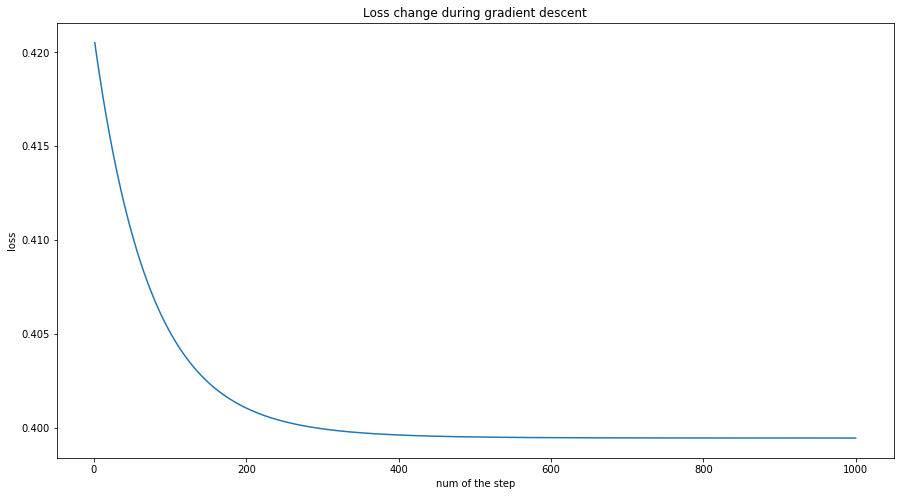

In [201]:
plt.figure(figsize=(15, 8))
plt.plot(iternum, history)
plt.title('Loss change during gradient descent')
plt.xlabel('num of the step')
plt.ylabel('loss')
plt.show()

# Практика (8 + 0.5*)

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score


%matplotlib inline

В этой части вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [2]:
data = pd.read_csv('train.csv', header=0)

In [3]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.drop('Id', axis=1, inplace=True)

## 1 (1)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [6]:
data.isnull().any().any() # пропуски есть

True

In [7]:
columns = data.columns

In [8]:
# подсчет количества пропусков в столбцах и их доля от общего числа значений в порядке убывания пропусков
list_kolvo_propuskov = []
for item in columns:
    if data[item].isnull().any().any():
        list_kolvo_propuskov.append([item, data[item].isna().sum(), data[item].isna().sum()/data.shape[0]])
        list_kolvo_propuskov = sorted(list_kolvo_propuskov, key = lambda x: x[1], reverse = True)
list_kolvo_propuskov

[['PoolQC', 1453, 0.9952054794520548],
 ['MiscFeature', 1406, 0.963013698630137],
 ['Alley', 1369, 0.9376712328767123],
 ['Fence', 1179, 0.8075342465753425],
 ['FireplaceQu', 690, 0.4726027397260274],
 ['LotFrontage', 259, 0.1773972602739726],
 ['GarageType', 81, 0.05547945205479452],
 ['GarageYrBlt', 81, 0.05547945205479452],
 ['GarageFinish', 81, 0.05547945205479452],
 ['GarageQual', 81, 0.05547945205479452],
 ['GarageCond', 81, 0.05547945205479452],
 ['BsmtExposure', 38, 0.026027397260273973],
 ['BsmtFinType2', 38, 0.026027397260273973],
 ['BsmtQual', 37, 0.025342465753424658],
 ['BsmtCond', 37, 0.025342465753424658],
 ['BsmtFinType1', 37, 0.025342465753424658],
 ['MasVnrType', 8, 0.005479452054794521],
 ['MasVnrArea', 8, 0.005479452054794521],
 ['Electrical', 1, 0.0006849315068493151]]

In [9]:
# Меньше всего данных в разделах PoolQC, MiscFeature, Alley, Fence.  Для данных колонок значения отсутствуют практически во всех строчках

## 2 (1)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [10]:
for item in columns:
    if data[item].isnull().any().any():
        print(item, data[item].dtype)

LotFrontage float64
Alley object
MasVnrType object
MasVnrArea float64
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinType2 object
Electrical object
FireplaceQu object
GarageType object
GarageYrBlt float64
GarageFinish object
GarageQual object
GarageCond object
PoolQC object
Fence object
MiscFeature object


In [11]:
for item in columns:
    if data[item].isnull().any().any():
        if data[item].dtype == 'float64':
            data[item].fillna(data[item].median(), inplace=True)
        if data[item].dtype == 'object':
            data_describe = data[item].describe()
            data[item].fillna(data_describe['top'], inplace=True)
data.isnull().any().any()

False

In [12]:
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True) # исходя их прошлого задания, в этиъ данных оченб большой процентт пропусков (больше 80%), поэтому я решила удалить эти колонки

In [13]:
data['FireplaceQu'].unique()
data.drop(['FireplaceQu'], axis=1, inplace=True)
# пропусков меньше, чем 80%, но их почти половина. От этого столбца тоже избавимся

## 3 (1)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [14]:
# для колонок с бинарными зачениями удобно сделать label encoding
objectcolumns = [item for item in data if data[item].dtype == 'object']
label_encoder = LabelEncoder()
for item in objectcolumns:
    if data[item].describe()['unique'] == 2:
        data[item] = label_encoder.fit_transform(data[item])


In [15]:
# для остальных удобнее применит one-hot-encoding, так как значений уже больше 2 и неудобно их нумеровать
Data = pd.get_dummies(data, drop_first=True)

## 4 (0.5)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

In [81]:
Data1 = Data.corr() # строит корреляционную матрицу 
Data1

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.356718,-0.139781,-0.024969,-0.022844,0.032628,-0.059316,0.027850,0.040581,0.023573,...,-0.001244,0.014005,-0.045156,-0.014555,0.026359,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.356718,1.000000,0.304522,-0.037349,-0.001027,0.234812,-0.053281,0.116685,0.083348,0.178469,...,0.012609,-0.051283,0.128995,-0.023074,-0.091864,-0.036570,-0.018040,0.016250,-0.074146,0.127293
LotArea,-0.139781,0.304522,1.000000,-0.197131,0.010123,0.105806,-0.005636,0.014228,0.013788,0.103321,...,0.001076,-0.015040,0.020039,-0.005722,-0.002292,-0.013208,0.008966,-0.010781,0.005711,0.022635
Street,-0.024969,-0.037349,-0.197131,1.000000,0.001682,0.058823,0.042848,0.021137,0.065465,0.017108,...,0.003766,0.003766,0.019397,0.002915,0.006539,0.003367,-0.112734,0.007571,-0.002140,0.019657
Utilities,-0.022844,-0.001027,0.010123,0.001682,1.000000,-0.001881,0.009994,-0.011505,-0.034080,0.063452,...,-0.001535,-0.001535,-0.007905,-0.001188,-0.067078,-0.001372,-0.002383,-0.003085,-0.055982,-0.008011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.016241,-0.036570,-0.013208,0.003367,-0.001372,-0.041677,-0.038888,-0.045601,-0.040294,-0.011783,...,-0.003073,-0.003073,-0.015827,-0.002378,0.020457,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,0.030002,-0.018040,0.008966,-0.112734,-0.002383,-0.044950,-0.033444,-0.010104,-0.020727,-0.013748,...,-0.005337,-0.005337,-0.027489,-0.004131,0.035530,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.000983,0.016250,-0.010781,0.007571,-0.003085,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,...,-0.006909,-0.006909,-0.035587,-0.005348,0.028599,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.024359,-0.074146,0.005711,-0.002140,-0.055982,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,...,-0.003139,0.027414,-0.645698,-0.097031,0.634322,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


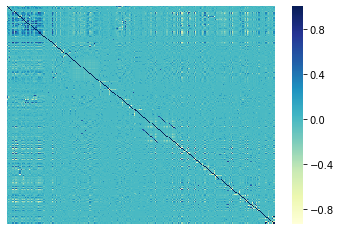

In [17]:
sns.heatmap(Data1, cmap="YlGnBu", xticklabels=False, yticklabels=False)

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [18]:
DataAbs = abs(Data1['SalePrice'])

In [19]:
DataAbs.sort_values() # минимальное абсолютное значение коэффициента корреляции Пирсона с "BsmtFinType2_GLQ", а максимальное с "OverallQual"

BsmtFinType2_GLQ     0.000076
RoofMatl_Metal       0.000304
RoofStyle_Mansard    0.000308
GarageCond_Gd        0.000983
Foundation_Wood      0.002711
                       ...   
GarageArea           0.623431
GarageCars           0.640409
GrLivArea            0.708624
OverallQual          0.790982
SalePrice            1.000000
Name: SalePrice, Length: 233, dtype: float64

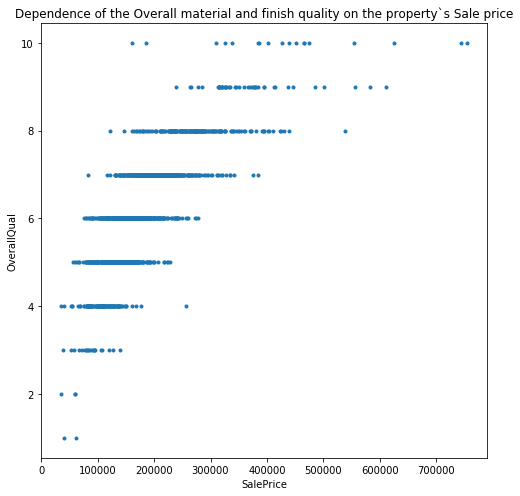

In [20]:
plt.figure(figsize=(8, 8))
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.title('Dependence of the Overall material and finish quality on the property`s Sale price')

plt.scatter(Data['SalePrice'], Data['OverallQual'], marker='.')

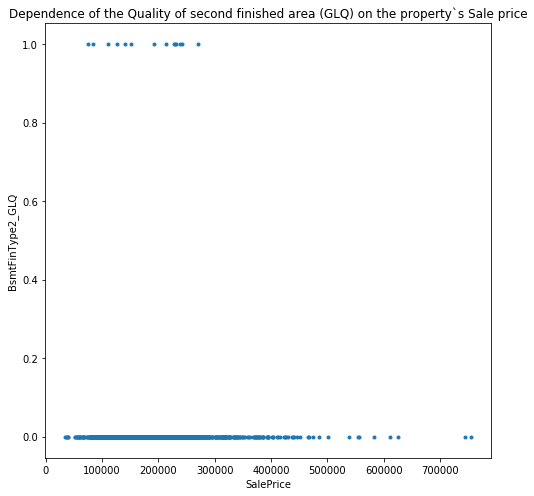

In [21]:
plt.figure(figsize=(8, 8))
plt.xlabel('SalePrice')
plt.ylabel('BsmtFinType2_GLQ')
plt.title('Dependence of the Quality of second finished area (GLQ) on the property`s Sale price')

plt.scatter(Data['SalePrice'], Data['BsmtFinType2_GLQ'], marker='.')

## 6 (0.5)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

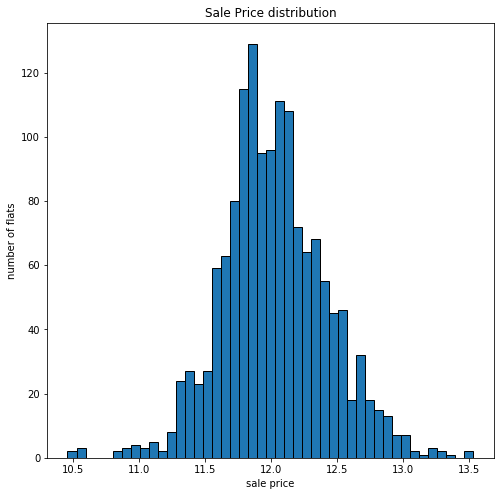

In [47]:
plt.figure(figsize=(8, 8))
plt.title('Sale Price distribution')
np.log1p(Data['SalePrice']).hist(bins=45, ec='black')
plt.xlabel('sale price')
plt.ylabel('number of flats')
plt.grid(axis ='both')
plt.show()

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [23]:
X_train, X_val, y_train, y_val = train_test_split(
    Data.drop('SalePrice', axis=1),
    np.log1p(Data['SalePrice']),
    random_state=13
)

In [24]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 232), (365, 232), (1095,), (365,))

## 7 (2)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [25]:
grid_searcher_knn = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={
    'n_neighbors': range(1, 60, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
    },
    cv=5)
grid_searcher_knn.fit(X_train, y_train)
best_predictions = grid_searcher_knn.predict(X_val)
RMSE_knn = np.sqrt(mean_squared_error(y_val, best_predictions))
print(RMSE_knn)

0.22455406367811467


In [26]:
grid_searcher_linreg = GridSearchCV(
    LinearRegression(),
    param_grid={
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'normalize': [True, False]
    },
    cv=5)
grid_searcher_linreg.fit(X_train, y_train)
best_predictions = grid_searcher_linreg.predict(X_val)
RMSE_linreg = np.sqrt(mean_squared_error(y_val, best_predictions))
print(RMSE_linreg)

0.216765745810247


In [74]:
the_best_linreg = Lasso(copy_X = grid_searcher_linreg.best_params_['copy_X'],
              fit_intercept = grid_searcher_linreg.best_params_['fit_intercept'], 
              normalize = grid_searcher_linreg.best_params_['normalize'])
the_best_linreg.fit(X_train, y_train)
the_best_linreg_coefs = the_best_lasso.coef_

In [72]:
grid_searcher_lasso = GridSearchCV(
    Lasso(),
    param_grid={
    'alpha': np.logspace(-3, 0, 10),
    'fit_intercept': [True, False],
    'normalize': [True, False]
    },
    cv=5)
grid_searcher_lasso.fit(X_train, y_train)
best_predictions = grid_searcher_lasso.predict(X_val)
RMSE_lasso = np.sqrt(mean_squared_error(y_val, best_predictions))
print(RMSE_lasso)

0.2240806194202102


In [73]:
the_best_lasso = Lasso(alpha = grid_searcher_lasso.best_params_['alpha'],
              fit_intercept = grid_searcher_lasso.best_params_['fit_intercept'], 
              normalize = grid_searcher_lasso.best_params_['normalize'])
the_best_lasso.fit(X_train, y_train)
the_best_lasso_coefs = the_best_lasso.coef_

In [70]:
grid_searcher_ridge = GridSearchCV(
    Ridge(),
    param_grid={
    'alpha':np.logspace(-3, 0, 100),
    'fit_intercept': [True, False],
    'normalize': [True, False]
    },
    cv=5)
grid_searcher_ridge.fit(X_train, y_train)
best_predictions = grid_searcher_ridge.predict(X_val)
RMSE_ridge = np.sqrt(mean_squared_error(y_val, best_predictions))
print(RMSE_ridge)

0.20482737040244897


In [75]:
the_best_ridge = Ridge(alpha = grid_searcher_ridge.best_params_['alpha'],
              fit_intercept = grid_searcher_ridge.best_params_['fit_intercept'], 
              normalize = grid_searcher_ridge.best_params_['normalize'])
the_best_ridge.fit(X_train, y_train)
the_best_ridge_coefs = the_best_ridge.coef_

## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

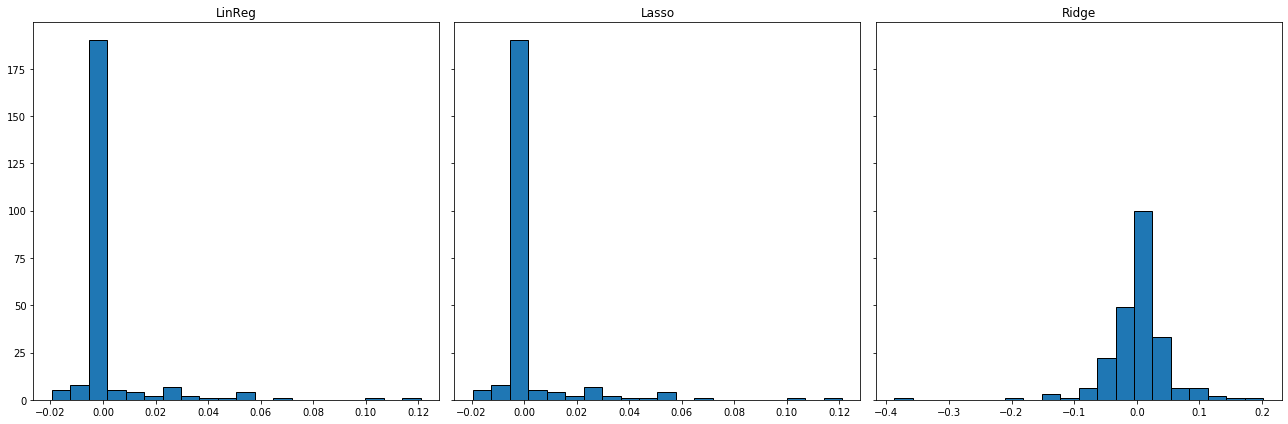

In [80]:
fig, weights = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(18, 6))


weights[0].hist(the_best_linreg_coefs, bins=20, ec='black')
weights[0].set_title('LinReg')


weights[1].hist(the_best_lasso_coefs, bins=20, ec='black')
weights[1].set_title('Lasso')


weights[2].hist(the_best_ridge_coefs, bins=20, ec='black')
weights[2].set_title('Ridge')


plt.tight_layout()

## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.212 на валидации по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

In [ ]:
# your code here

## 10* (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.210 на валидации по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [ ]:
# your code here

# Теория (1.5*)

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

*(your solution here)*

## 2* (0.5)

Алгоритм регрессии выдает константный ответ для любого объекта: $a(x) = C$. Найдите $C$, при котором средняя абсолютная ошибка на обучающей выборке $\{(x_1, y_1), \ldots, (x_\ell, y_\ell)\}$ будет минимальной.

*(your solution here)*

## 3* (0.5)

Гарри Поттер хочет найти философский камень, расположенный в точке минимума функции $f(x_1, x_2)=x_1^2 + x_2^2$. В момент времени 0 он стартует из точки $x^{(0)}=(2, 2)$. На $i$-й минуте Гарри мгновенно перемещается (аппарирует) из точки $x^{(i)}$ в точку

$$
x^{(i+1)} = x^{(i)} - \eta \nabla f(x^{(i)}),
$$

где $\nabla f(x^{(i)})$ — градиент $f$ в точке $x^{(i)}$, $\eta \ge 0$ — фиксированное число. Опишите судьбу Гарри в зависимости от значения $\eta$. При каких значениях $\eta$ Гарри подойдёт к философскому камню сколь угодно близко? Сколько итераций ему понадобится, чтобы подойти к философскому камню на расстояние не больше $\varepsilon$?

*(your solution here)*